In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("https://github.com/mlefkir/beauxgraphs/raw/main/beautifulgraphs_colblind.mplstyle")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

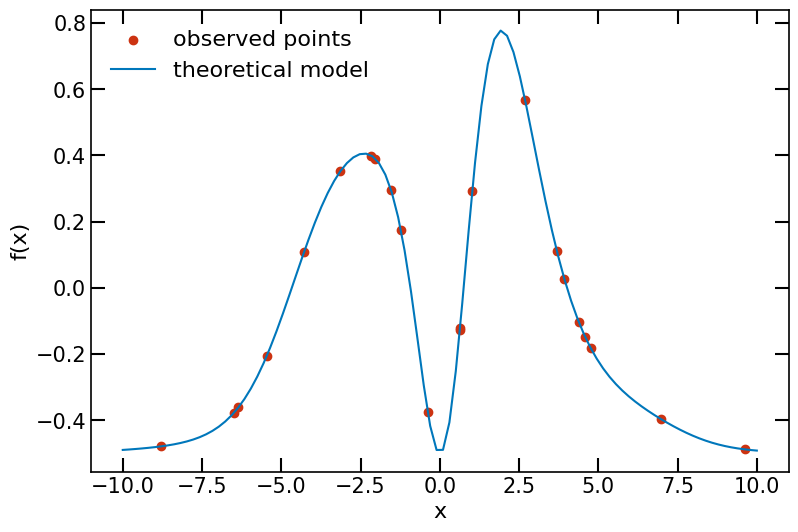

In [2]:
def f_obs(x):
    # function to produce observed/training values
    return x**2*np.exp(0.2*np.sin(x))/np.cosh(x)-0.5

np.random.seed(123) # to keep the same randomness or something like that...
x_theo = np.linspace(-10,10,100)

n = 22 # number of observed points / training points
# get some points from the uniform distribution
x = (np.random.rand(n)*20-10).reshape(-1, 1) 
# reshape(-1,1) to convert to a column vector
f = f_obs(x).reshape(-1, 1)
fig = plt.figure(figsize=(9,6))
plt.scatter(x,f,color=colors[4],label="observed points")
plt.plot(x_theo,f_obs(x_theo),label="theoretical model")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [26]:
# testing points
n_t = 500
x_t = np.linspace(-10,10,n_t).reshape(-1,1) # convert to column vector

def covariance_function(xq,xp):
    # squared exponential covariance function
    val = np.sum(xq**2,1).reshape(-1,1) + np.sum(xp**2,1) - 2 * np.dot(xq,xp.T)
    return np.exp(-.5 * np.abs(val))

def is_positive_definite(M):
    return (np.linalg.eigvals(M)>0).all()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


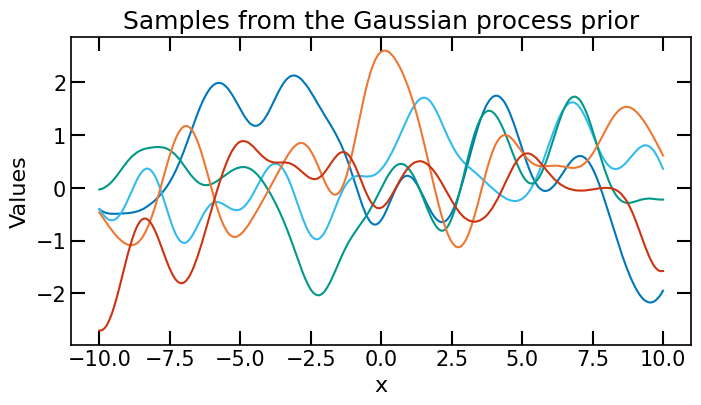

In [35]:
# we apply the covariance function to the testing points to obtain the GP priors 
K_xtxt = covariance_function(x_t,x_t)
L = np.linalg.cholesky(K_xtxt+1e-6*np.eye(n_t))
#priors = np.random.multivariate_normal(mean=np.zeros(len(x_t)),cov=K_xtxt,size=(5,))
priors = np.dot(L,np.random.normal(size=(n_t,5)))
fig = plt.figure(figsize=(8,4))
plt.plot(x_t,priors)
plt.xlabel('x')
plt.ylabel('Values')
plt.title("Samples from the Gaussian process prior")
plt.legend()
fig.savefig("GP_prior.pdf",bbox_inches='tight')

In [28]:
K_xx = covariance_function(x,x)
K_xtx = covariance_function(x_t,x)
K_xxt = K_xtx.T
K_xtxt = covariance_function(x_t,x_t)
# (K_xxt.T==K_xtx).all() = True

In [29]:
import scipy.linalg as la

In [30]:
# the posterior GP after taking into account the observed data is a multivariate Gaussian
mean_post = np.dot(np.dot(K_xtx,np.linalg.inv(K_xx)),f)
cov_post = K_xtxt-np.dot(np.dot(K_xtx,np.linalg.inv(K_xx)),K_xxt)
std = np.sqrt(np.diag(cov_post))

/tmp/ipykernel_170721/80865060.py:4: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(np.diag(cov_post))


/tmp/ipykernel_170721/809890105.py:4: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(np.diag(cov_post))


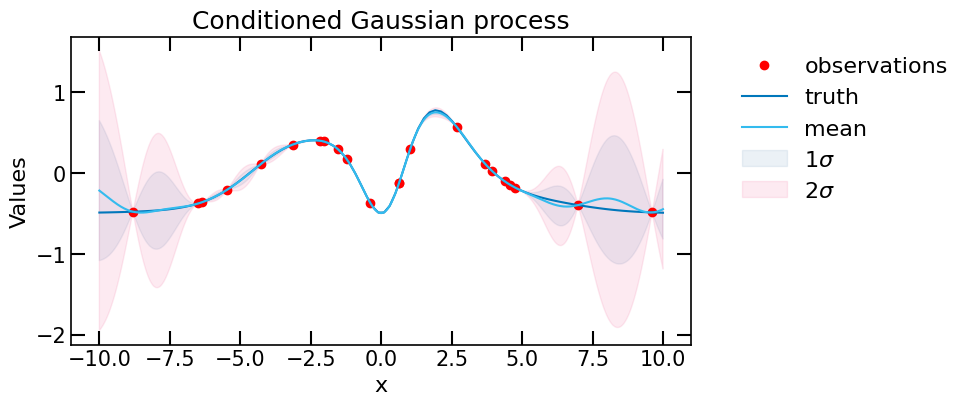

In [49]:
# the posterior GP after taking into account the observed data is a multivariate Gaussian
mean_post = np.dot(np.dot(K_xtx,np.linalg.inv(K_xx)),f)
cov_post = K_xtxt-np.dot(np.dot(K_xtx,np.linalg.inv(K_xx)),K_xxt)
std = np.sqrt(np.diag(cov_post))
alpha = np.dot(np.linalg.inv(K_xx),f)

posterior_GP = np.random.multivariate_normal(mean_post.T[0],cov_post)
np.random.seed(1)

fig, ax  = plt.subplots(1,1,figsize=(8,4))
ax.set_title('Conditioned Gaussian process')
ax.plot(x,f,'ro',label="observations")
ax.plot(x_theo,f_obs(x_theo),label="truth")
ax.plot(x_t,mean_post,label="mean")
ax.set_xlabel('x')
ax.set_ylabel('Values')
ax.fill_between(x_t.T[0],mean_post.T[0]-std,mean_post.T[0]+std,alpha=0.1,color=colors[6],label=r"$1\sigma$")
ax.fill_between(x_t.T[0],mean_post.T[0]-2*std,mean_post.T[0]+2*std,alpha=0.1,color=colors[5],label=r"$2\sigma$")
ax.legend(ncol=1,bbox_to_anchor=(1.05,1),loc="upper left")
fig.savefig("GP_posterior.pdf",bbox_inches='tight')
#ax.fill_between(x_t.T[0],mean_post.T[0]-3*std,mean_post.T[0]+3*std,alpha=0.2)

In [114]:
index

array([3.92938371])